# 질문할 것 있음 
### flixparol 크롤링해온 데이터셋 그냥 활용하면 3600개 다 활용 가능한데 그냥 이거 쓰면 안될지? 컨트리도 거의 살아있고 viewpoint도 같이 나오는데 originCountry랑 상관관계 볼때는 데이터셋 늘려도 되지 않을까 ?

### 보니까 제작 스튜디오도 604개 빼고 다 살아있고, value도 null값 없고, release date 5개 없고, 장르는 70개 없고, country는 298개 누락됨 

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

# 데이터 시각화
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 가설검정
from scipy import stats

# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 자연어 처리
# import spacy

# 정규화
from sklearn.preprocessing import MinMaxScaler

#표준화
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# counter
from collections import Counter

# 데이터 정보 확인

In [2]:
df=pd.read_csv('3.1_original_useDf_0714.csv')
df.head(1)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount
0,0,thequeensgambit,44867,TV,United States,Drama,"'Argentina', 'Australia', 'Belgium', 'Brazil'...",36


# 결측치 확인
df.isnull().sum()

In [3]:
df.describe().round()

,Num,Value,countryCount
count,2960.0,2960.0,2960.0
mean,1480.0,634.0,16.0
std,855.0,2202.0,14.0
min,0.0,1.0,1.0
25%,740.0,22.0,3.0
50%,1480.0,80.0,10.0
75%,2219.0,321.0,35.0
max,2959.0,44867.0,37.0


# viewpoint 정규화 

## min-max 정규화 

In [4]:
min_max_scaler = MinMaxScaler()
value = df[['Value','countryCount']].values

#df['Value_std'] = min_max_scaler.fit_transform(value.reshape(-1,1))
df[['Value_std','countryCount_std']] = min_max_scaler.fit_transform(value)

df.head(1)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount,Value_std,countryCount_std
0,0,thequeensgambit,44867,TV,United States,Drama,"'Argentina', 'Australia', 'Belgium', 'Brazil'...",36,1.0,0.972222


In [5]:
df.describe()

,Num,Value,countryCount,Value_std,countryCount_std
count,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000
mean,1479.500000,633.733446,16.180405,0.014103,0.421678
std,854.622724,2202.145547,14.071531,0.049083,0.390876
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,739.750000,22.000000,3.000000,0.000468,0.055556
50%,1479.500000,80.000000,10.000000,0.001761,0.250000
75%,2219.250000,321.000000,35.000000,0.007132,0.944444
max,2959.000000,44867.000000,37.000000,1.000000,1.000000


## 표준화 실시

In [6]:
scaler = StandardScaler()
value2=df[['Value_std','countryCount_std']].values

df[['Value_norm','countryCount_norm']] = scaler.fit_transform(value2)

df.head(1)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount,Value_std,countryCount_std,Value_norm,countryCount_norm
0,0,thequeensgambit,44867,TV,United States,Drama,"'Argentina', 'Australia', 'Belgium', 'Brazil'...",36,1.0,0.972222,20.089835,1.408727


In [7]:
df.describe()

,Num,Value,countryCount,Value_std,countryCount_std,Value_norm,countryCount_norm
count,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2.960000e+03,2.960000e+03
mean,1479.500000,633.733446,16.180405,0.014103,0.421678,9.493907e-16,3.143131e-16
std,854.622724,2202.145547,14.071531,0.049083,0.390876,1.000169e+00,1.000169e+00
min,0.000000,1.000000,1.000000,0.000000,0.000000,-2.873744e-01,-1.078985e+00
25%,739.750000,22.000000,3.000000,0.000468,0.055556,-2.778367e-01,-9.368300e-01
50%,1479.500000,80.000000,10.000000,0.001761,0.250000,-2.514943e-01,-4.392876e-01
75%,2219.250000,321.000000,35.000000,0.007132,0.944444,-1.420371e-01,1.337649e+00
max,2959.000000,44867.000000,37.000000,1.000000,1.000000,2.008983e+01,1.479804e+00


# kind of producing countries 와 viewpoint

## df_country

In [8]:
df_country = df[['Value','originCountry']]

In [9]:
df_country.head(1)

,Value,originCountry
0,44867,United States


## null값 확인 및 제거 

In [10]:
df_country.isnull().sum()

Value              0
originCountry    206
dtype: int64

In [11]:
df_country = df_country.dropna(subset=['originCountry'])
df_country=df_country.reset_index()

In [12]:
df_country.tail(5)

,index,Value,originCountry
2749,2955,1,United States
2750,2956,1,United States
2751,2957,1,United States
2752,2958,1,United States
2753,2959,1,United States


In [13]:
# 컬럼값 변경
df_country=df_country[['Value','originCountry']]
df_country

,Value,originCountry
0,44867,United States
1,42149,Poland
2,27138,United States
3,25729,United States
4,23480,United States
...,...,...
2749,1,United States
2750,1,United States
2751,1,United States
2752,1,United States


In [14]:
# 결측치 확인
df_country.isnull().sum()

Value            0
originCountry    0
dtype: int64

# Which country produces the most Contents?

## 2020 넷플릭스 컨텐츠 인기순위 생산국가 (종합) 

In [15]:
view_all = df_country
view_all

,Value,originCountry
0,44867,United States
1,42149,Poland
2,27138,United States
3,25729,United States
4,23480,United States
...,...,...
2749,1,United States
2750,1,United States
2751,1,United States
2752,1,United States


### 생산 국가별 영화 제작 수

#### conter_viewAll 변수 생성

In [16]:
# 생산국가의 빈도수 세기
counter_viewAll=view_all.originCountry.value_counts()
counter_viewAll

United States     1569
United Kingdom     177
Japan              126
South Korea        109
India               82
                  ... 
Bulgaria             1
Cyprus               1
Croatia              1
Angola               1
Georgia              1
Name: originCountry, Length: 65, dtype: int64

#### Series를 DataFrame으로 변경 

In [17]:
counter_all=counter_viewAll.rename_axis('originCountry').reset_index(name='counts')
counter_viewAll=counter_all
counter_viewAll

,originCountry,counts
0,United States,1569
1,United Kingdom,177
2,Japan,126
3,South Korea,109
4,India,82
...,...,...
60,Bulgaria,1
61,Cyprus,1
62,Croatia,1
63,Angola,1


In [18]:
counter_viewAll.head(10)

,originCountry,counts
0,United States,1569
1,United Kingdom,177
2,Japan,126
3,South Korea,109
4,India,82
5,France,73
6,Canada,52
7,Spain,43
8,Turkey,39
9,Philippines,39


In [19]:
tot = sum(counter_viewAll.counts)
top10 = sum(counter_viewAll.counts[:10]) 

print(f'total : {tot}')
print(f'top 10 countries : {top10}')
print(f'percentage : {top10}/{tot} = {100 * top10/tot}')

total : 2754
top 10 countries : 2309
percentage : 2309/2754 = 83.84168482207699


####  인기 순위 전체 분석 insight

전체 작품수 2754개 중에 영화 제작을 많이 하는 top10위 권의 나라가 2309개를 만들어, 순위권의 83프로를 생산하고 있다.
제작 건수가 많은 top10 countries는 미국, 영국, 일본, 한국, 인도, 프랑스. 케나다, 스페인, 터키, 필리핀이 포함된다.

### 전체 영화 제작 국가 top 10위 시각화 

In [20]:
df_all = counter_viewAll[:][:10]

In [21]:
values=df_all['counts']
labels = df_all['originCountry']

In [22]:
fig = plt.figure(figsize=(10, 5), dpi=350)
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(view_dfdf['country'],
            view_dfdf['counter'], ax=ax, palette="RdGy", edgecolor='black')
ax.set_xticklabels(view_dfdf['country'], 
                   fontdict={'color':'white'},
                   rotation='90')
#ax.set_title('Top 20 Viewpoint country', fontsize=15, fontweight='bold', pad=20)

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.xlabel('Country', fontdict={'color':'white','fontsize':20}) ## x축 라벨 출력
plt.ylabel('Count', fontdict={'color':'white', 'fontsize':20})
plt.show()

NameError: name 'gridspec' is not defined

<Figure size 3500x1750 with 0 Axes>

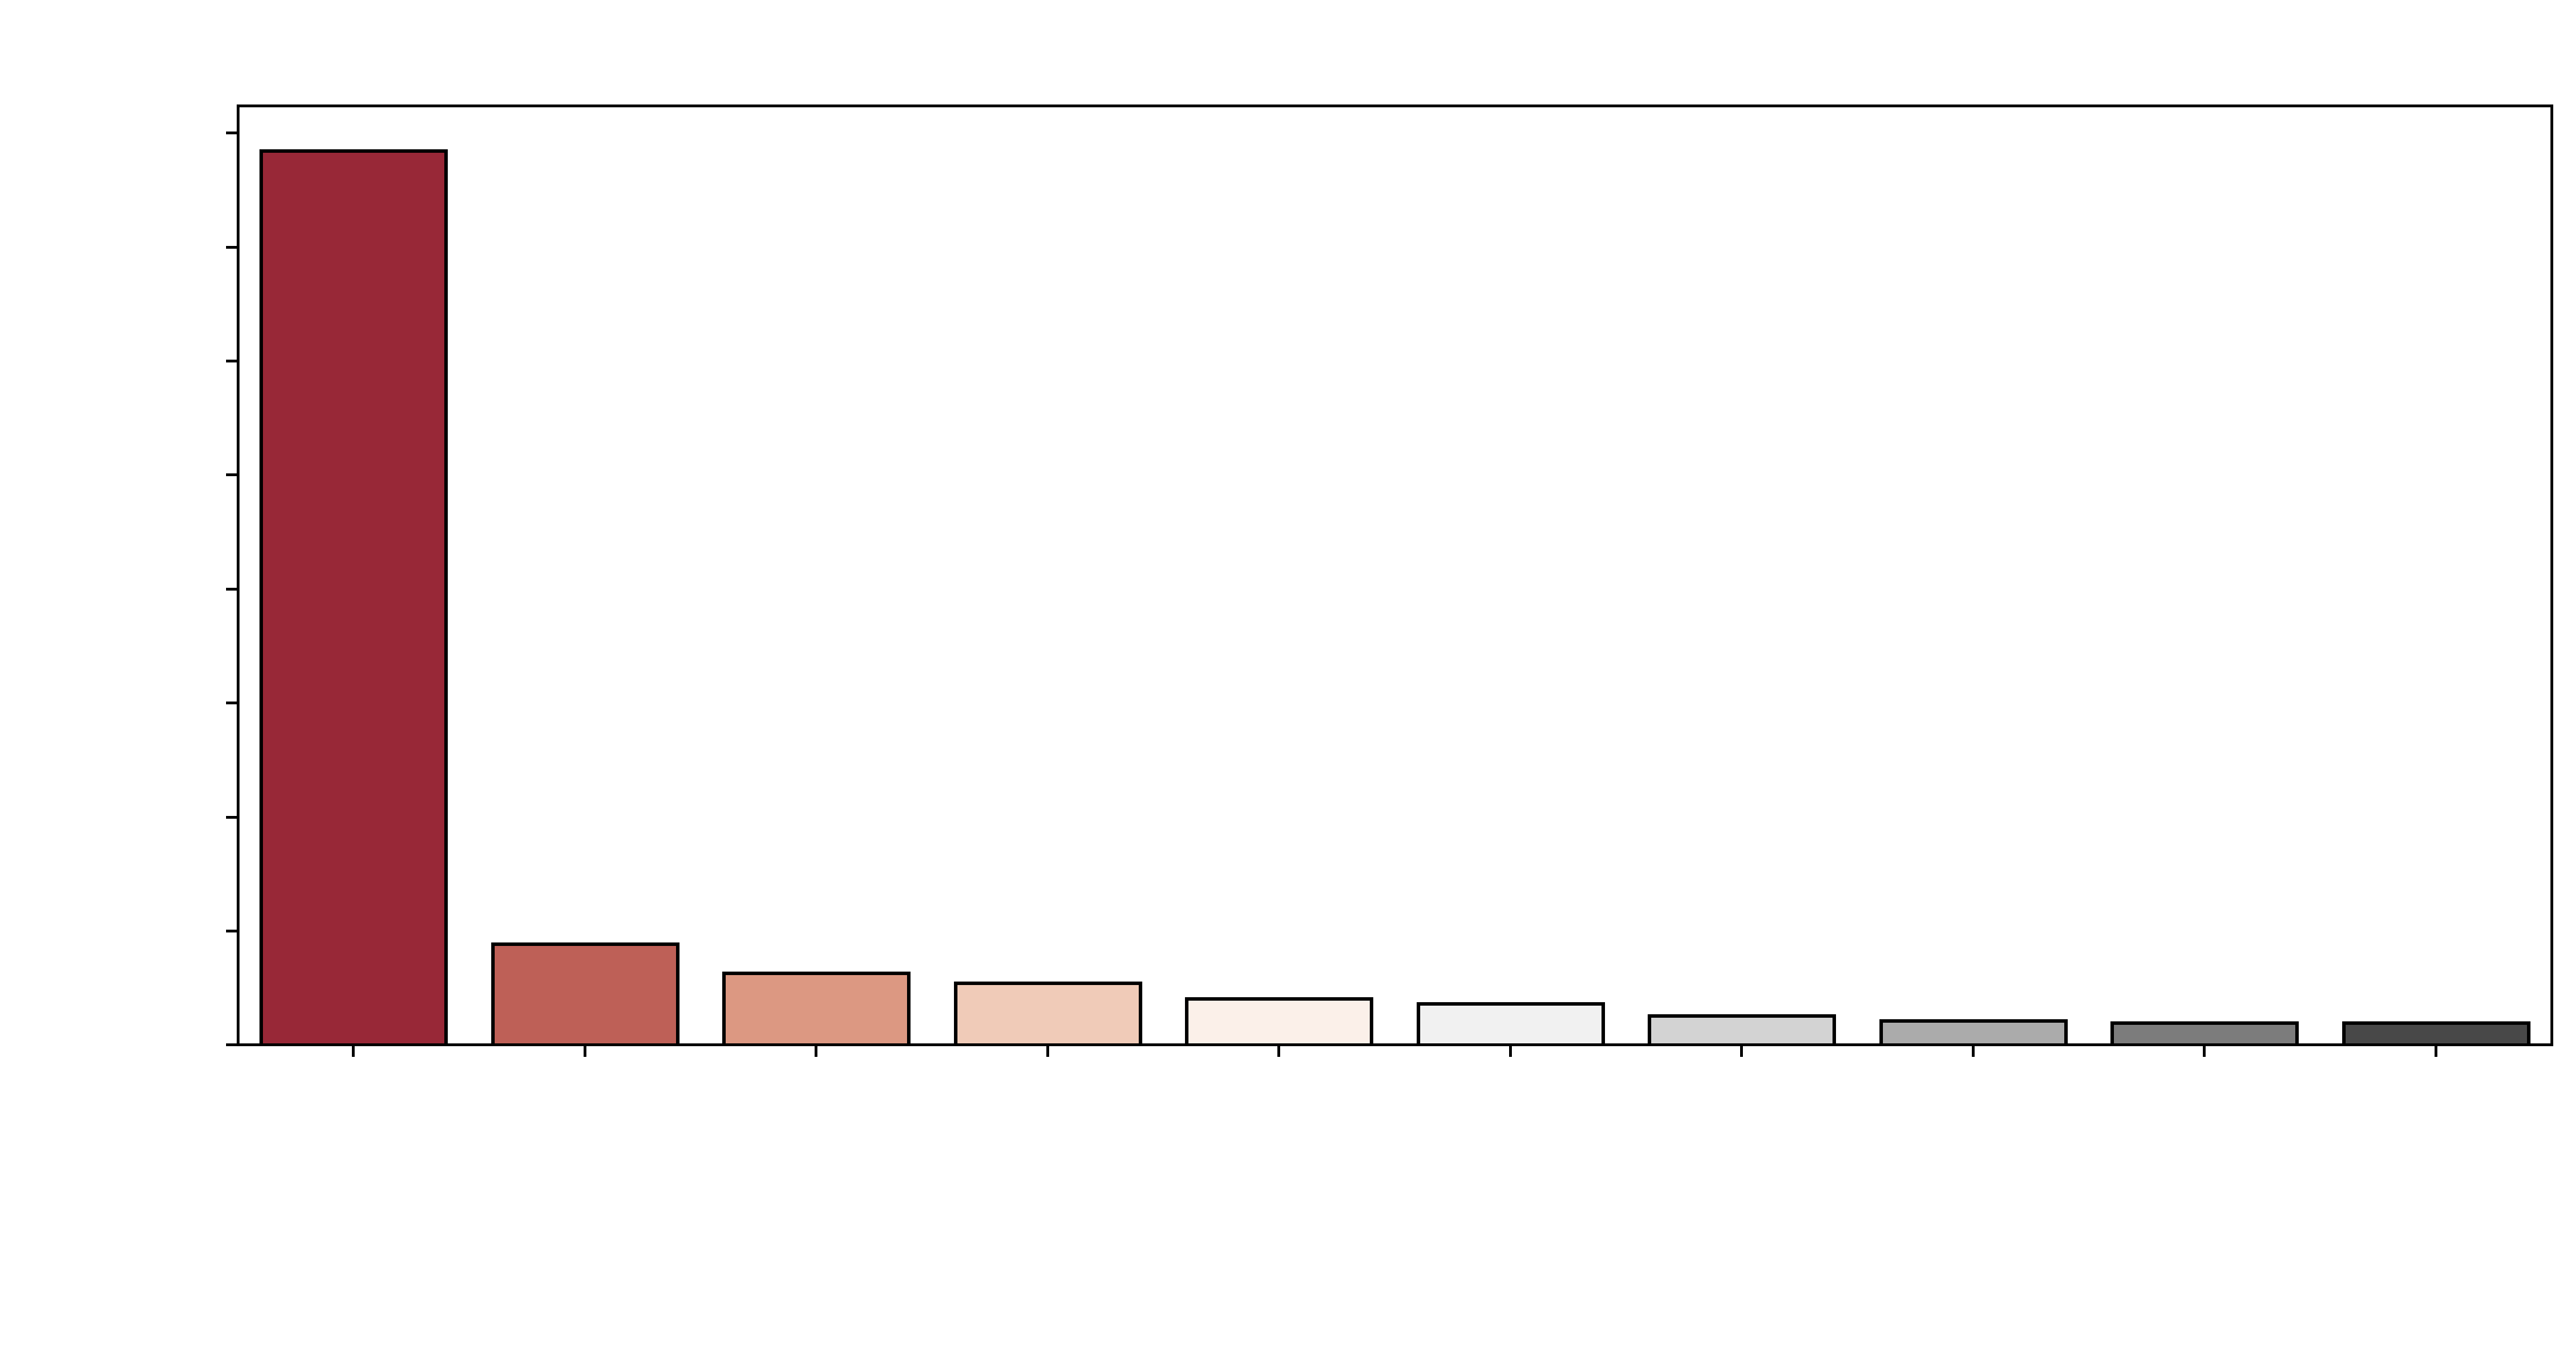

In [81]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12,5), dpi=350)
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(df_all['originCountry'], 
            df_all['counts'], ax=ax, palette="RdGy",
           edgecolor='black')
ax.set_xticklabels(df_all['originCountry'], 
                   rotation='90', fontdict={'color':'white'},
                   fontsize = 13)
ax.set_yticklabels(df_all['counts'], minor=True,
                   rotation='90', fontdict={'color':'white'},
                   fontsize = 13)
#ax.set_title('Top 10 producing countries of Netflix', fontsize=20, fontweight='bold', pad = 15)
plt.xlabel('origin of Country', fontsize=12, labelpad=-20, 
           fontweight='bold', color='white')
plt.ylabel('produced contents', fontsize=12, 
           labelpad=10, fontweight='bold', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.xlabel('Origin country', fontdict={'color':'white','fontsize':20}) ## x축 라벨 출력
plt.ylabel('Number of Movie & TV show', fontdict={'color':'white', 'fontsize':20})

plt.show()
# def make_autopct(values):
#     def my_autopct(pct):
#         total = sum(values)
#         val = int(round(pct*total/100.0))
#         return '{p:.2f}%({v:d})'.format(p=pct,v=val)
#     return my_autopct

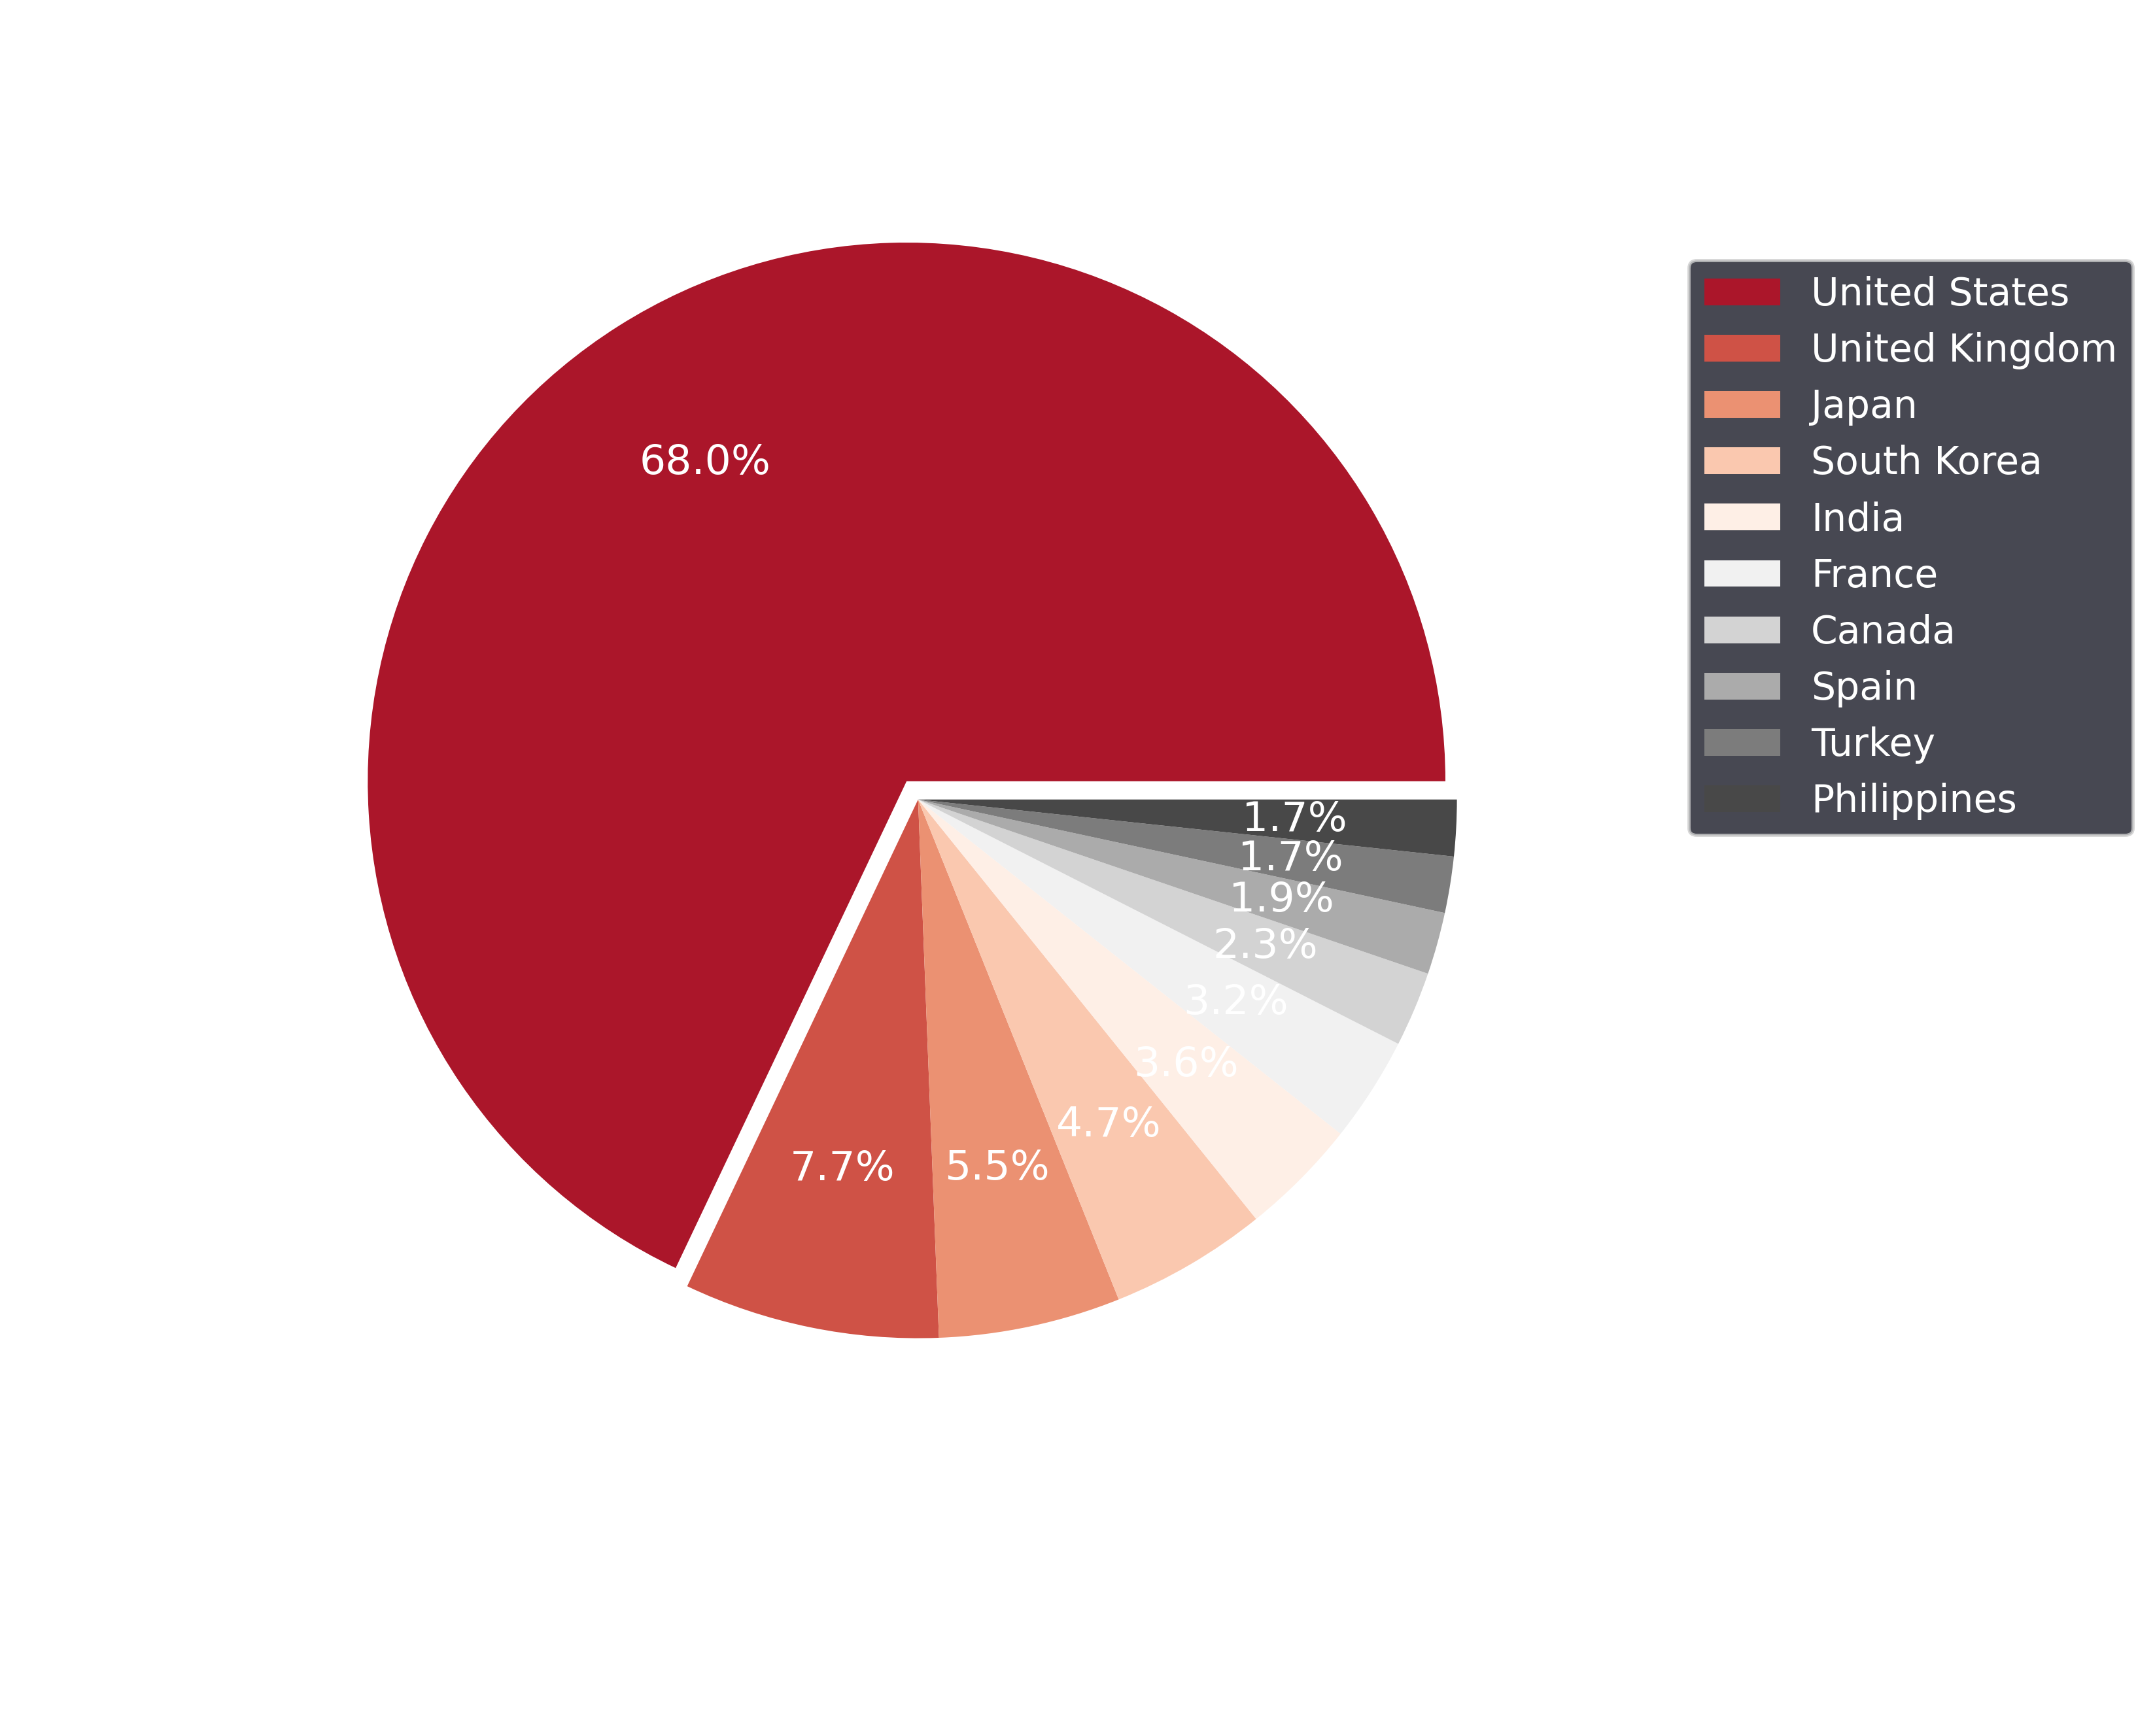

In [39]:
fig = plt.figure(figsize=(10,7), dpi=350)
gs = gridspec.GridSpec(nrows=1, ncols=1)


explode = [0 for _ in range(10)]
explode[0] = 0.06

ax2 = plt.subplot(gs[0])
ax2.pie(df_all['counts'], labels=df_all['originCountry'],
        #shadow=True, 
        startangle=720, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=10),
        textprops={'fontsize':13, 'color':'white'},
        pctdistance=0.7, labeldistance=1.1,rotatelabels=True,
        autopct = '%1.1f%%', radius=1.5
       )


ax2.axis('equal') 
ax2.legend(loc='right', fontsize = 12, facecolor = '#191b27', labelcolor= 'white', bbox_to_anchor=(1.2,0.7))
plt.show()

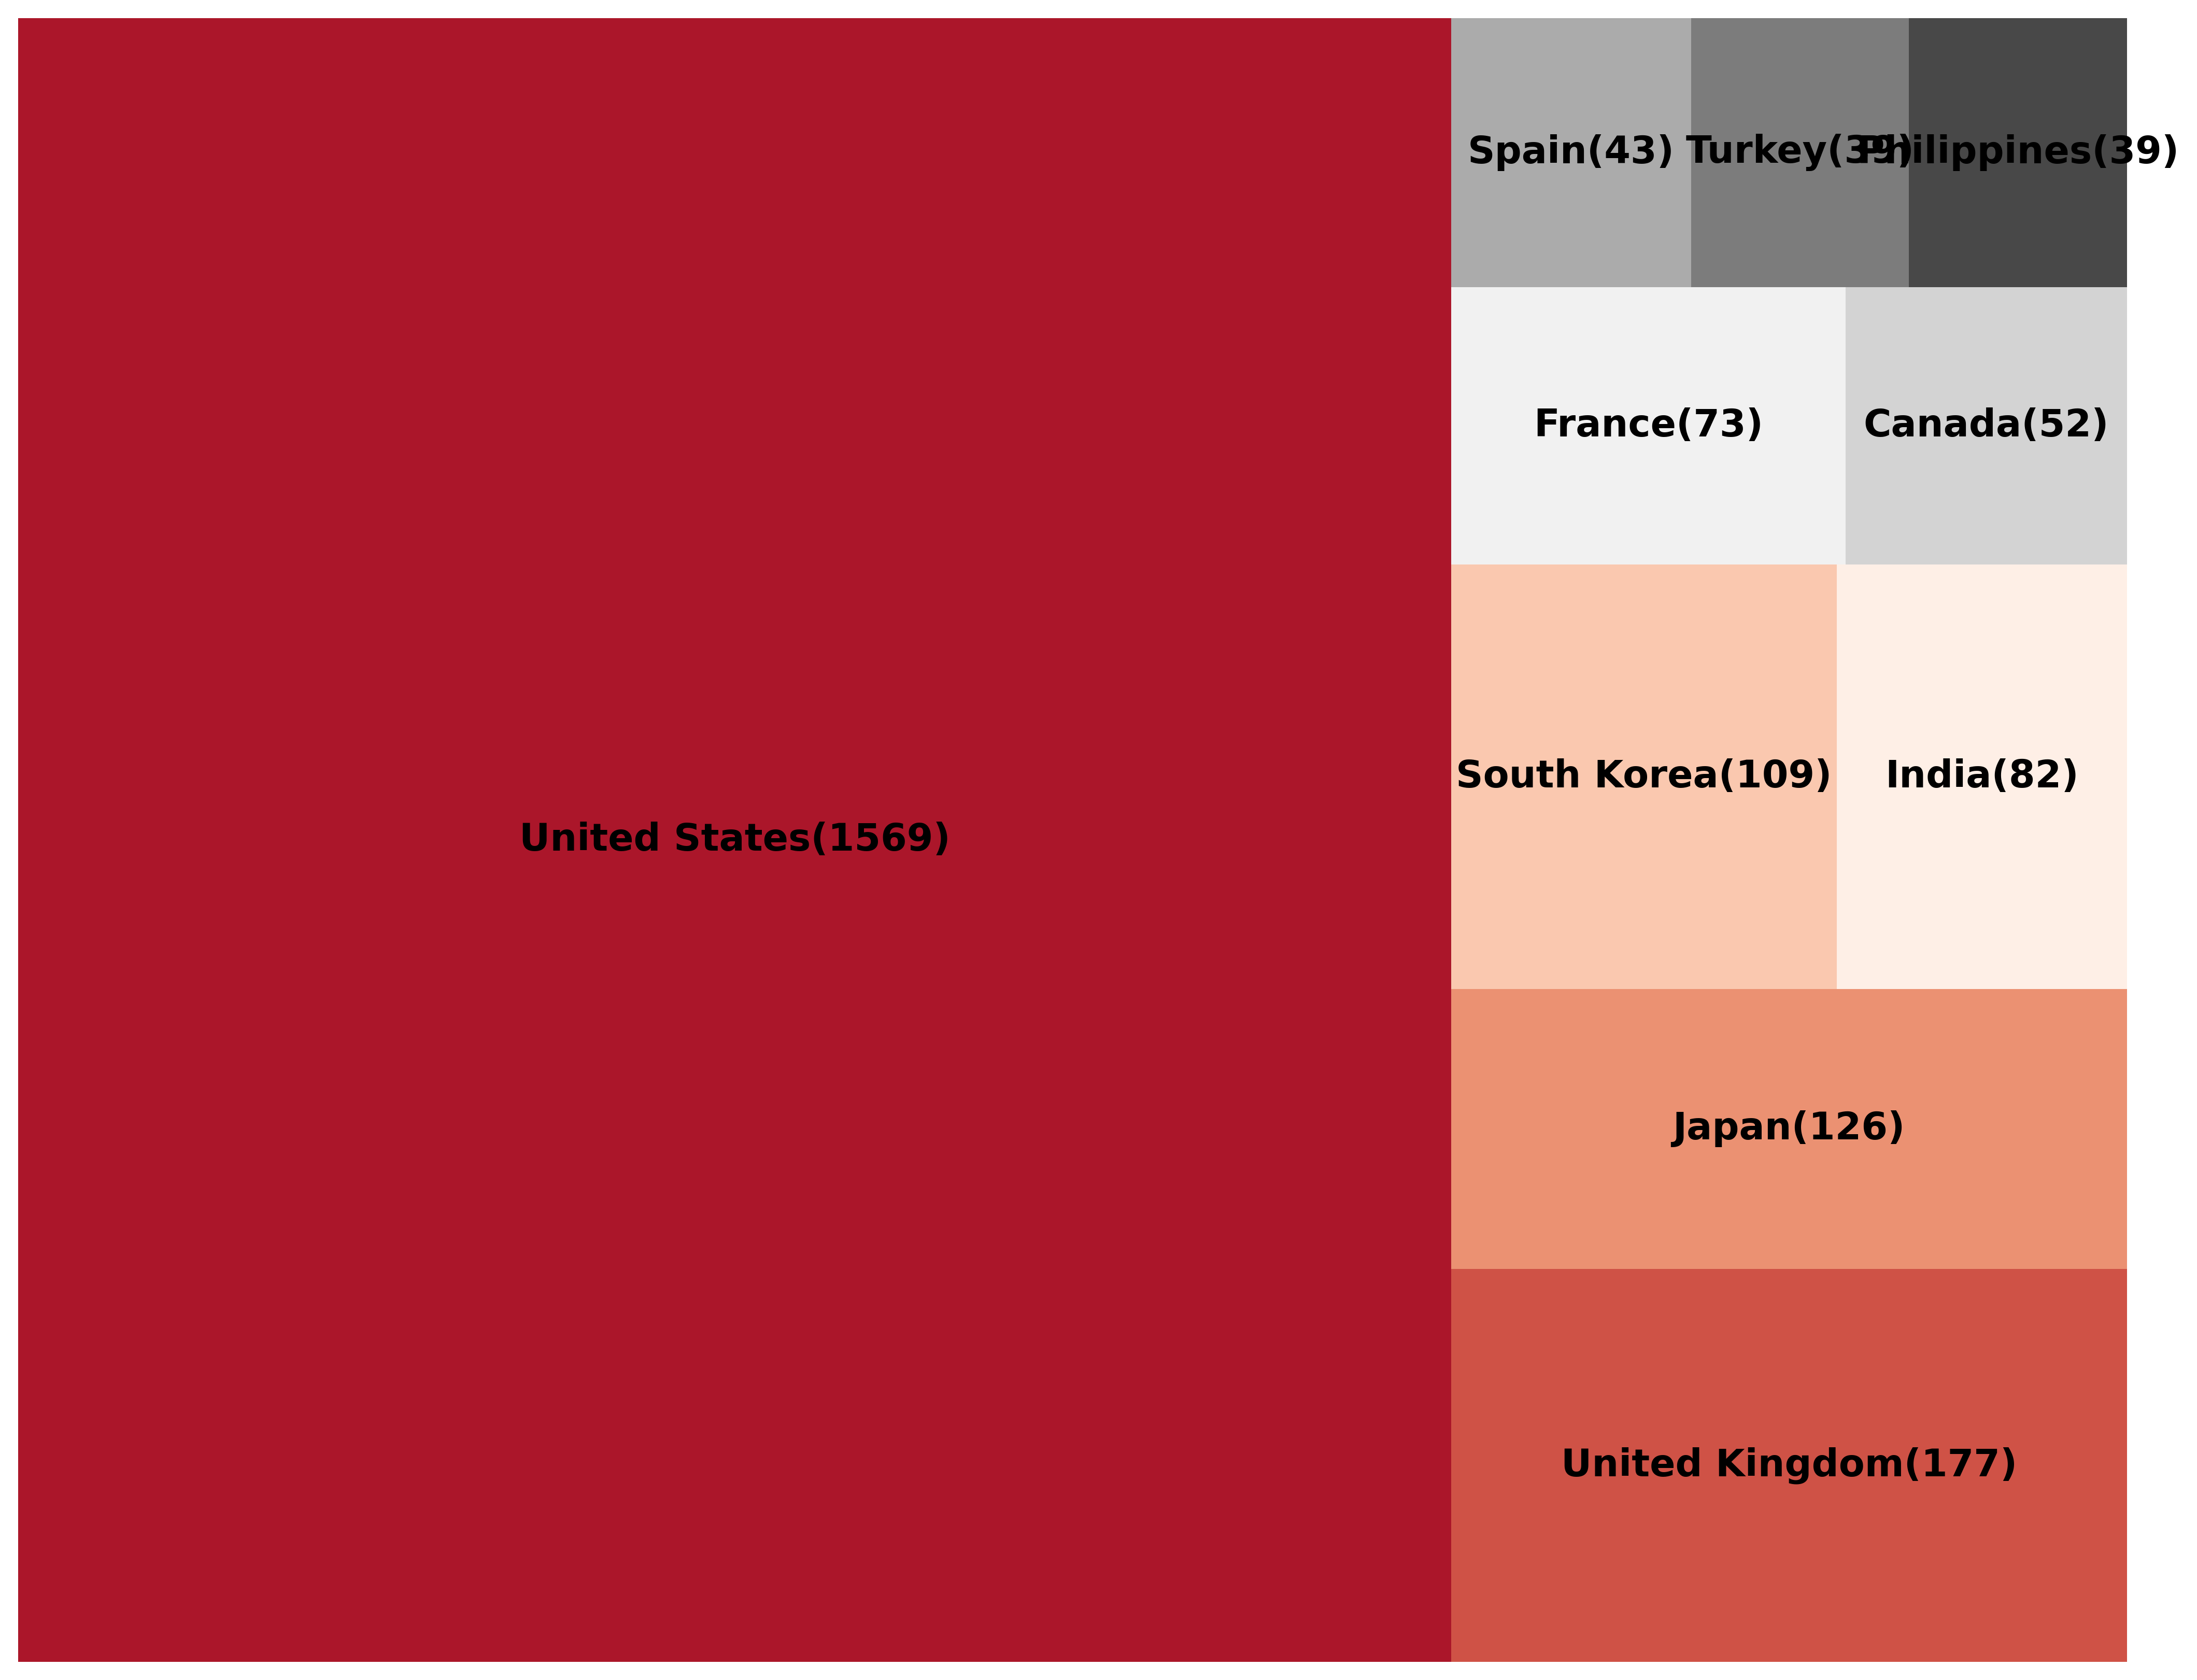

In [57]:
import squarify

fig = plt.figure(figsize=(15,12), dpi=350)
squarify.plot(sizes = values, 
              #label = labels, 
              label=["{}({})".format(a, b) for a, b in zip(labels, df_all['counts'])],
              color=sns.color_palette("RdGy", n_colors=10),
             linewidth=4, text_kwargs={'fontsize':15, 'fontweight' : 'bold'})
#plt.title('Top 10 producing countries of Netflix', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold', pad=20)
plt.axis('off')

plt.show()

In [58]:
# 특수 아이콘 적용을 위한 모듈
import json
import requests

INDENT = " " * 4
VERSION = "5.5.0"
URI = "https://raw.githubusercontent.com/FortAwesome/Font-Awesome/master/metadata/icons.json"


def main():
    icons = json.loads(requests.get(URI).text)

    # Group icons by style
    mapping = {}
    for k, v in icons.items():
        for style in v["styles"]:
            style_name = style.upper()
            if style_name not in mapping.keys():
                mapping[style_name] = {}
            mapping[style_name][k] = chr(int(v["unicode"], 16))

    with open("pywaffle/fontawesome_mapping.py", "w") as file:
        file.write("# This file belongs to Font Awesome, see license https://fontawesome.com/license/\n")
        file.write("# Font Awesome version: {0}\n".format(VERSION))
        file.write("\n")
        file.write("icons = ")
        file.write(json.dumps(mapping, indent=4))
        file.write("\n")
# ! git clone https://github.com/gyli/PyWaffle.git

if __name__ == "__main__":
    main()

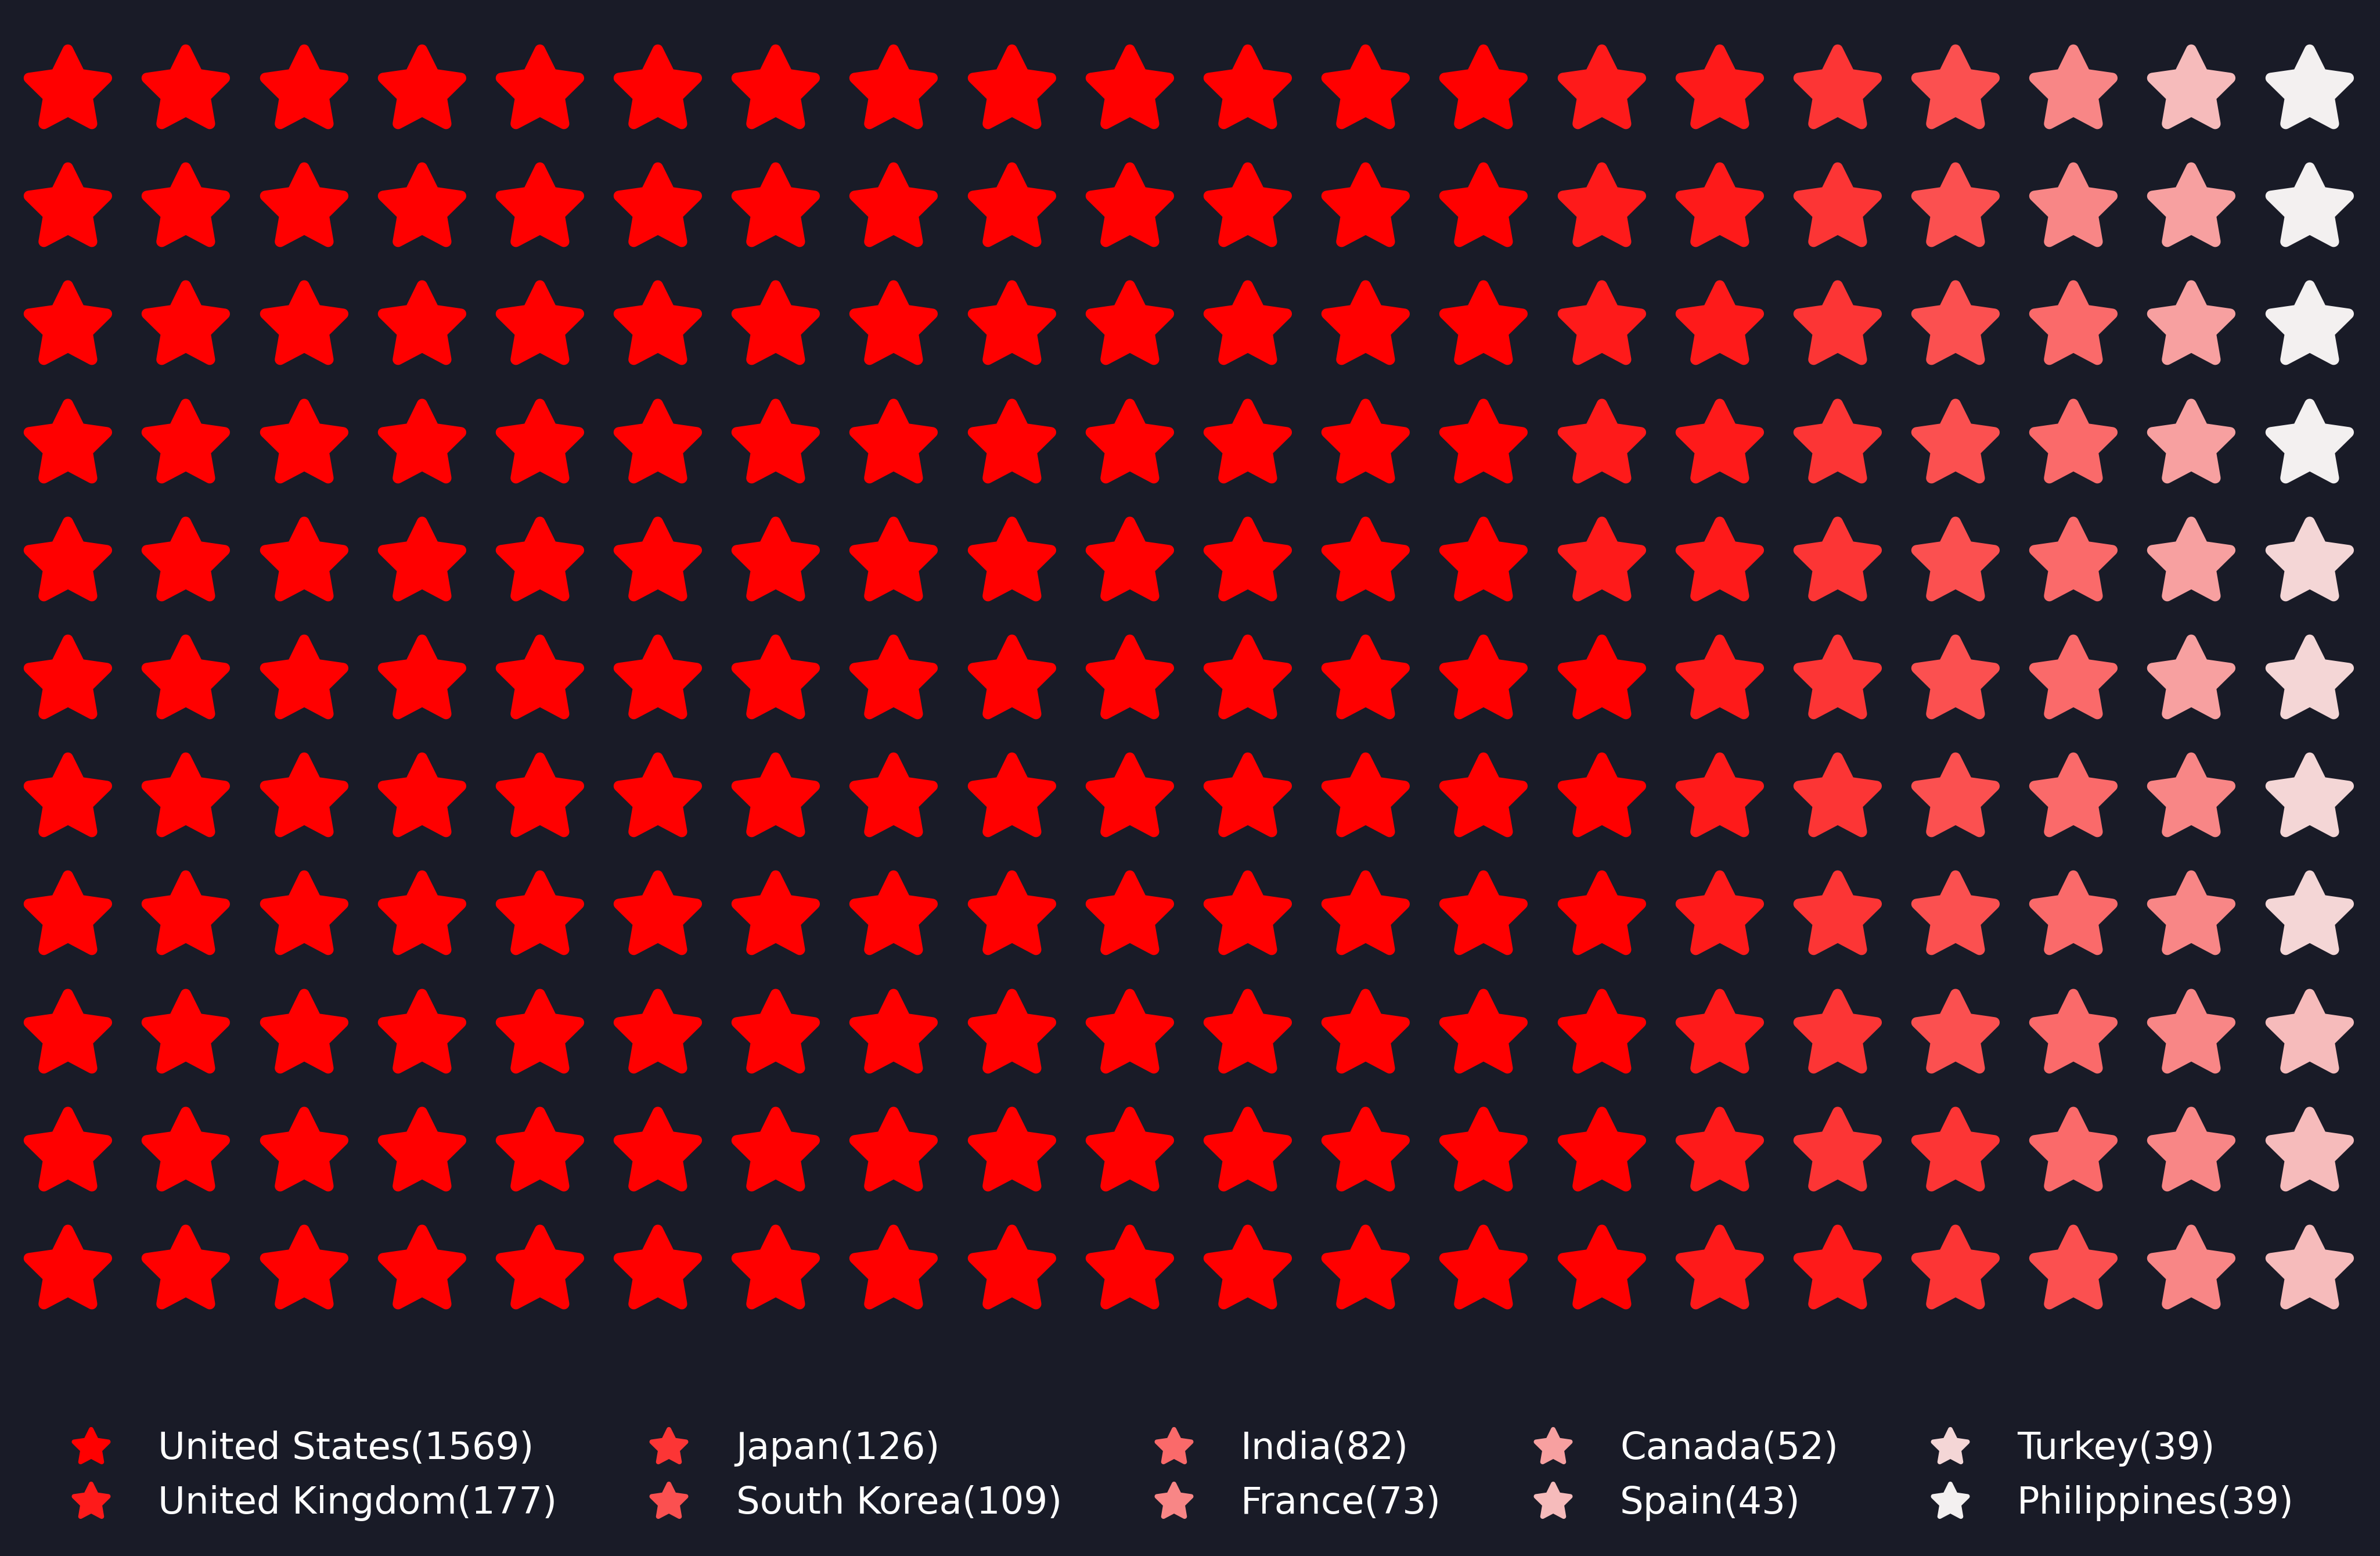

In [60]:
from pywaffle import Waffle
from pywaffle.fontawesome_mapping import icons
fig = plt.figure(
    FigureClass=Waffle,facecolor='#191b27', dpi=350,
    rows=11, 
    columns=20, 
    values=df_all['counts'],
    labels=["{}({})".format(a, b) for a, b in zip(labels, values)],
    #colors=sns.color_palette("autumn", n_colors=10),
    colors=sns.light_palette('red', reverse = True, n_colors=10),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 
            'ncol': len(df_all['counts'])//2,  'framealpha': 0, 'labelcolor': 'white', 'fontsize':13.2}, 
    font_size=30,
    #icon_style='solid',
    figsize=(13, 13),
    icons='star',
    #characters='N',
    icon_legend=True)

# plt.title('Top 10 producing countries of Netflix', position=(0.5, 1.0+0.03), fontsize = 15, 
          #fontweight='bold', color='white')
plt.show()

## 2020 넷플릭스 컨텐츠 인기 순위 100위의 생산국가 

### view_top100 변수 생성 

In [61]:
view_top100 = df_country[:][:100]
view_top100.tail(5)

,Value,originCountry
95,4476,United States
96,4459,France
97,4356,United States
98,4285,Germany
99,4267,United States


### 인기 순위 100위까지 생산국가 별 제작 영화 수 
#### counter_view100 변수 생성

In [62]:
# 생산국가의 빈도수 세기
counter_view100=view_top100.originCountry.value_counts()
counter_view100

United States     69
South Korea        7
United Kingdom     6
Spain              4
Colombia           3
France             2
Germany            2
Canada             2
Italy              1
Russia             1
Mexico             1
China              1
Poland             1
Name: originCountry, dtype: int64

In [63]:
type(counter_view100)

pandas.core.series.Series

#### Series를 dataFrame으로 변경

In [64]:
counter_100=counter_view100.rename_axis('originCountry').reset_index(name='counts')
counter_view100=counter_100
counter_view100

,originCountry,counts
0,United States,69
1,South Korea,7
2,United Kingdom,6
3,Spain,4
4,Colombia,3
5,France,2
6,Germany,2
7,Canada,2
8,Italy,1
9,Russia,1


### 인기순위 100위 분석 insight

In [65]:
tot100 = sum(counter_view100.counts)
top5 = sum(counter_view100.counts[:5]) 

print(f'total : {tot}')
print(f'top 5 countries : {top5}')
print(f'percentage : {top5}/{tot} = {100 * top5/tot}')

total : 2754
top 5 countries : 89
percentage : 89/2754 = 3.2316630355846043


1. 인기 순위 100위 중에 south korea의 작품이 7건이 포함되어 있다.
2. 일본은 순위권에 포함되지도 못했다. 
3. 전체 2754개의 영화중에 korea 출신의 작품은 108개로 다소 적은 편이지만, top 100에는 7개나 포함되어 있어서 그 인기를 실감할 수 있다.
4. 반면 일본은 126건을 생산했지만 100위 안에는 1개도 포함되어 있지 않다. 이런 스타일의 작품은 안통하는 것 같다 ㅋㅋ

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12,5), dpi=350)
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(df_all['originCountry'], 
            df_all['counts'], ax=ax, palette="RdGy",
           edgecolor='black')
ax.set_xticklabels(df_all['originCountry'], 
                   rotation='90', fontdict={'color':'white'},
                   fontsize = 13)
ax.set_yticklabels(df_all['counts'], 
                   rotation='90', fontdict={'color':'white'},
                   fontsize = 13)
#ax.set_title('Top 10 producing countries of Netflix', fontsize=20, fontweight='bold', pad = 15)
plt.xlabel('origin of Country', fontsize=12, labelpad=-20, 
           fontweight='bold', color='white')
plt.ylabel('produced contents', fontsize=12, 
           labelpad=10, fontweight='bold', color='white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Origin country', fontdict={'color':'white','fontsize':20}) ## x축 라벨 출력
plt.ylabel('Number of Movie & TV show', fontdict={'color':'white', 'fontsize':20})

plt.show()

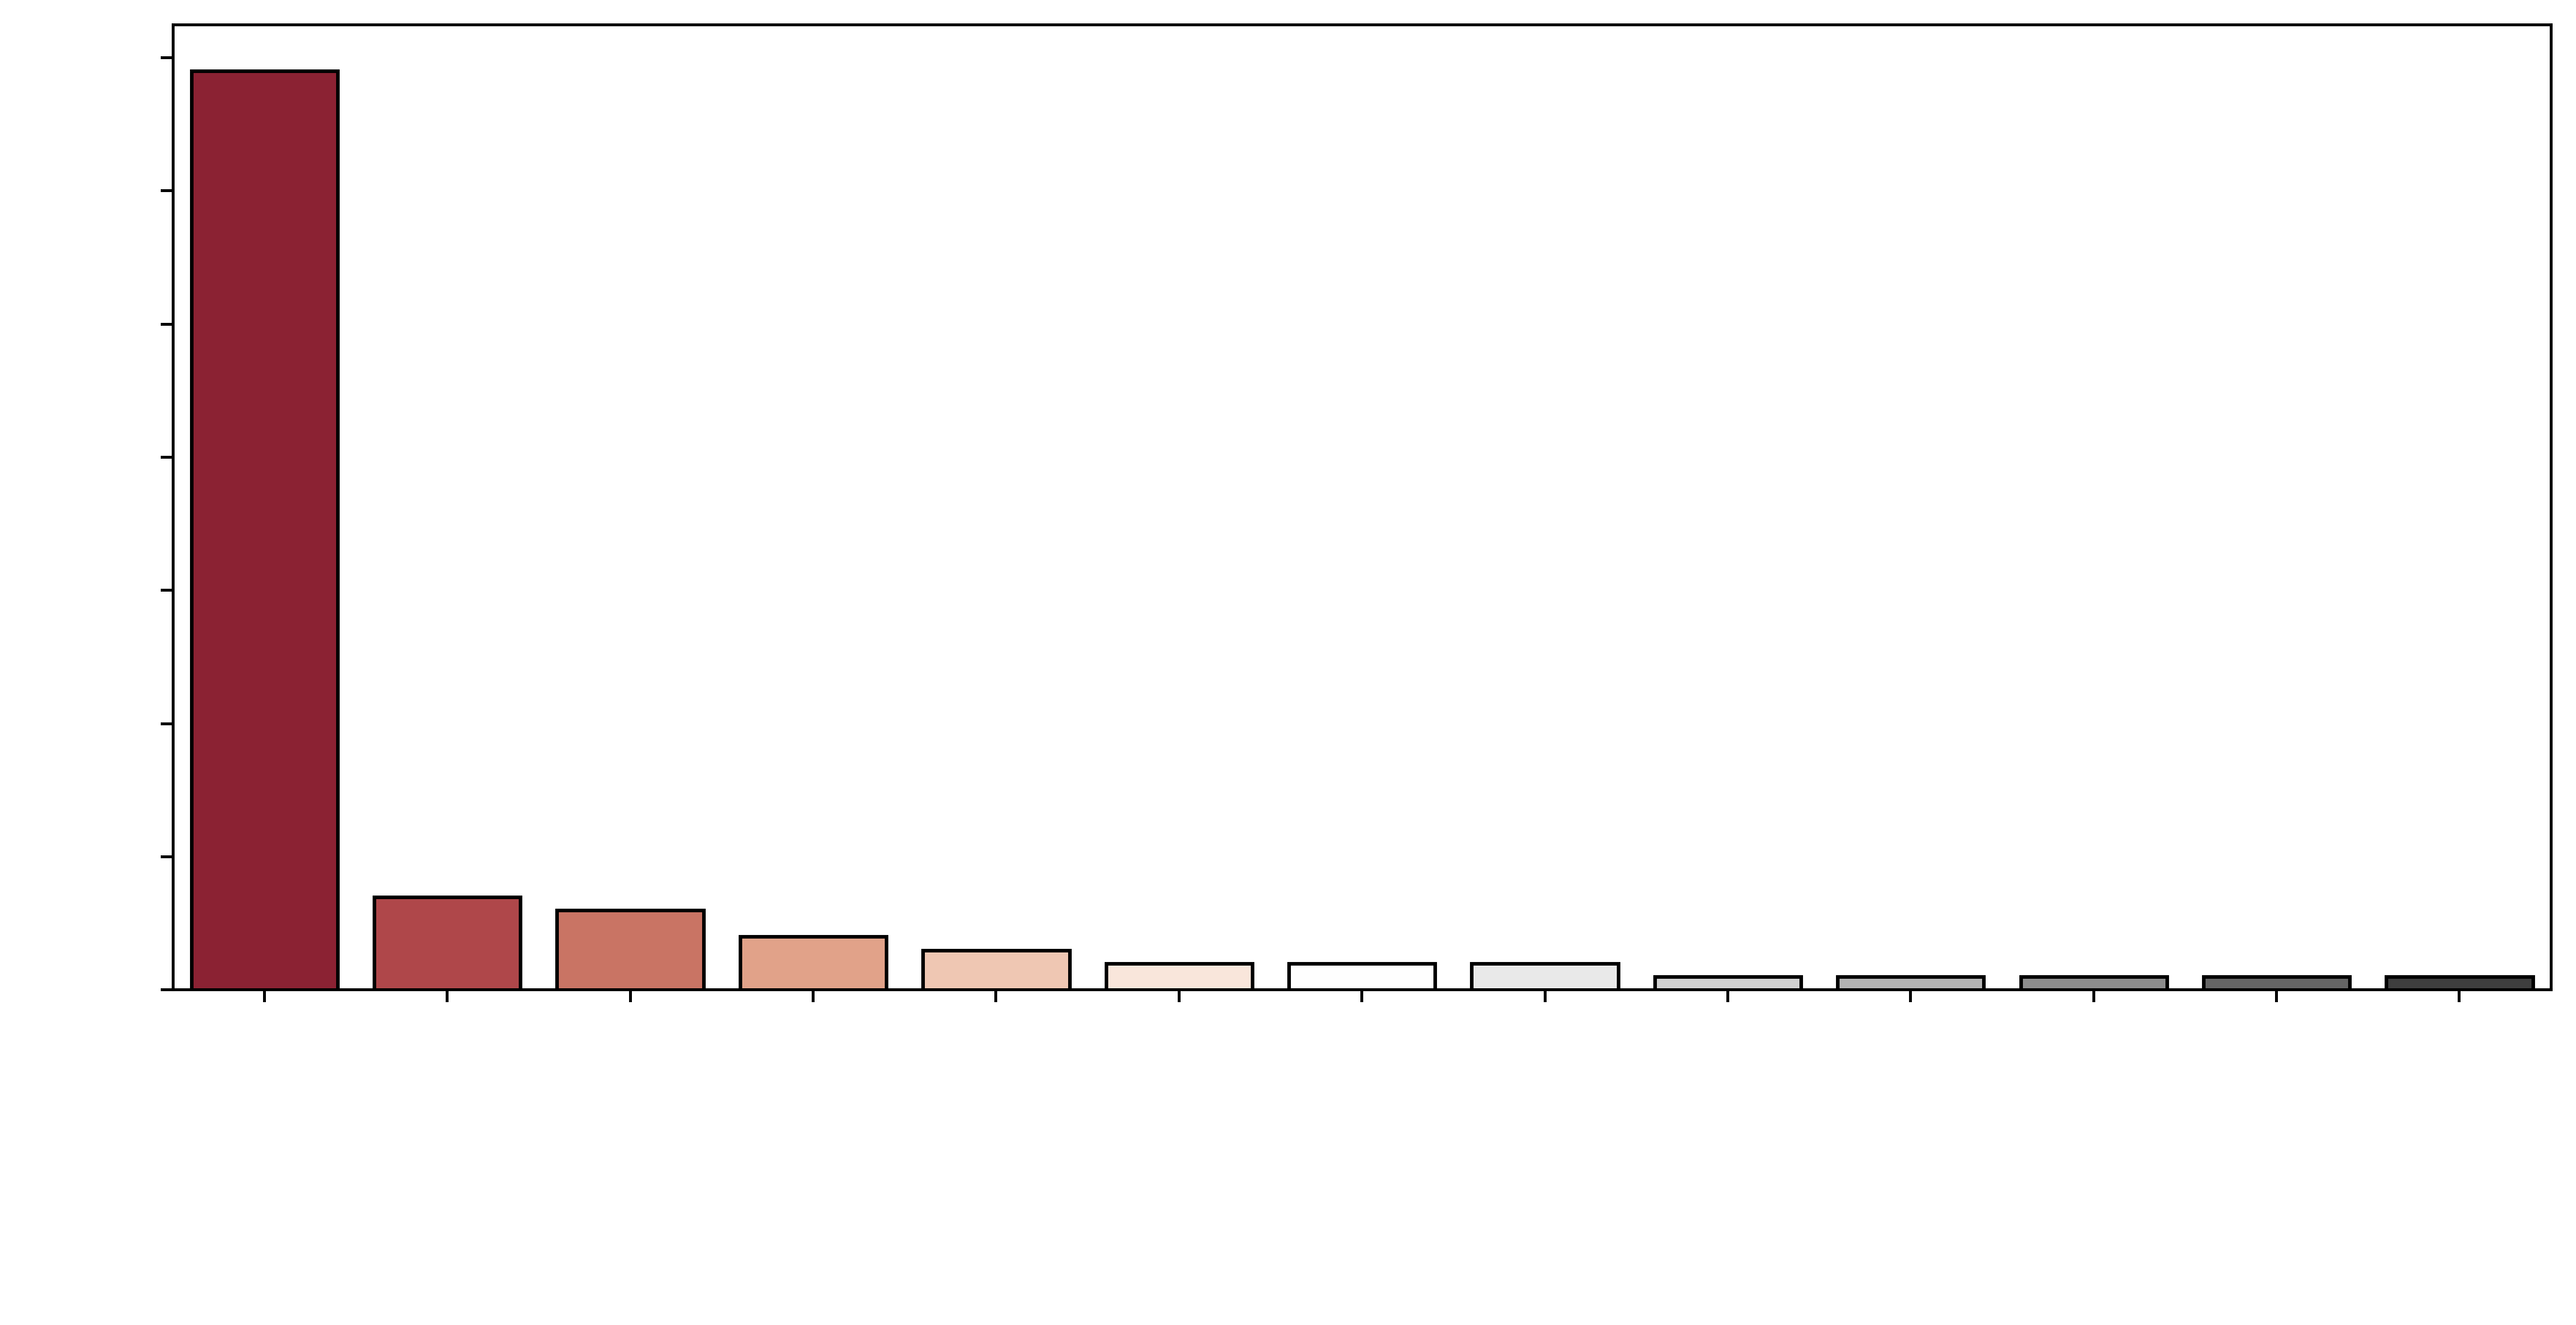

In [82]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12,5), dpi=350)
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(counter_view100['originCountry'], 
            counter_view100['counts'], ax=ax, 
            palette="RdGy", edgecolor = 'black')
ax.set_xticklabels(counter_view100['originCountry'],
                   fontdict={'color':'white'},
                   rotation='90', fontsize = 13)
ax.set_yticklabels(counter_view100['counts'],
                   fontdict={'color':'white'},minor=True,
                   rotation='90', fontsize = 13)
# ax.set_title('Country of origin of Netflix Top 100 (2020)', fontsize=20, fontweight='bold', pad = 15)
plt.xlabel('origin of Country', fontsize=12, 
           labelpad=-20, fontweight='bold',color='white')
plt.ylabel('produced contents', fontsize=12, 
           labelpad=10, fontweight='bold', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
# plt.xlabel('Origin country', fontdict={'color':'white','fontsize':20}) ## x축 라벨 출력
# plt.ylabel('Number of Movie & TV show', fontdict={'color':'white', 'fontsize':20})


plt.show()

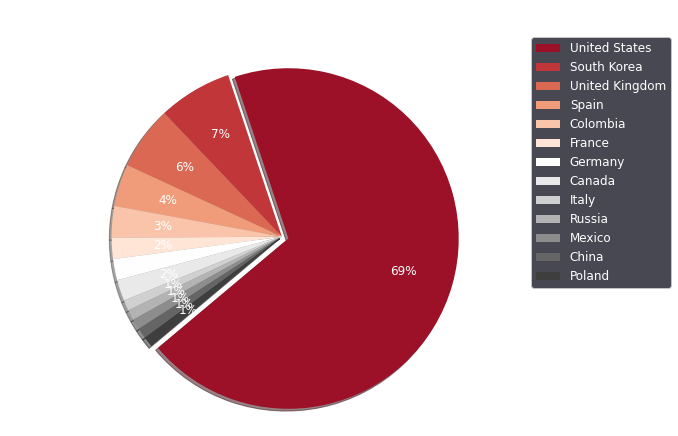

In [91]:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(nrows=1, ncols=1)


explode = [0 for _ in range(len(counter_view100['originCountry']))]
explode[0] = 0.06

ax2 = plt.subplot(gs[0])
ax2.pie(counter_view100['counts'], labels=counter_view100['originCountry'],
        shadow=True, startangle=220, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=13),
        textprops={'fontsize':12,'color':'white'},
        pctdistance=0.7, labeldistance=1.1,rotatelabels=True,
        autopct = '%1.0f%%', radius=1.5
       )


ax2.axis('equal') 
ax2.legend(loc='right', fontsize = 12, facecolor = '#191b27', labelcolor= 'white', bbox_to_anchor=(1.2,0.7))
plt.show()

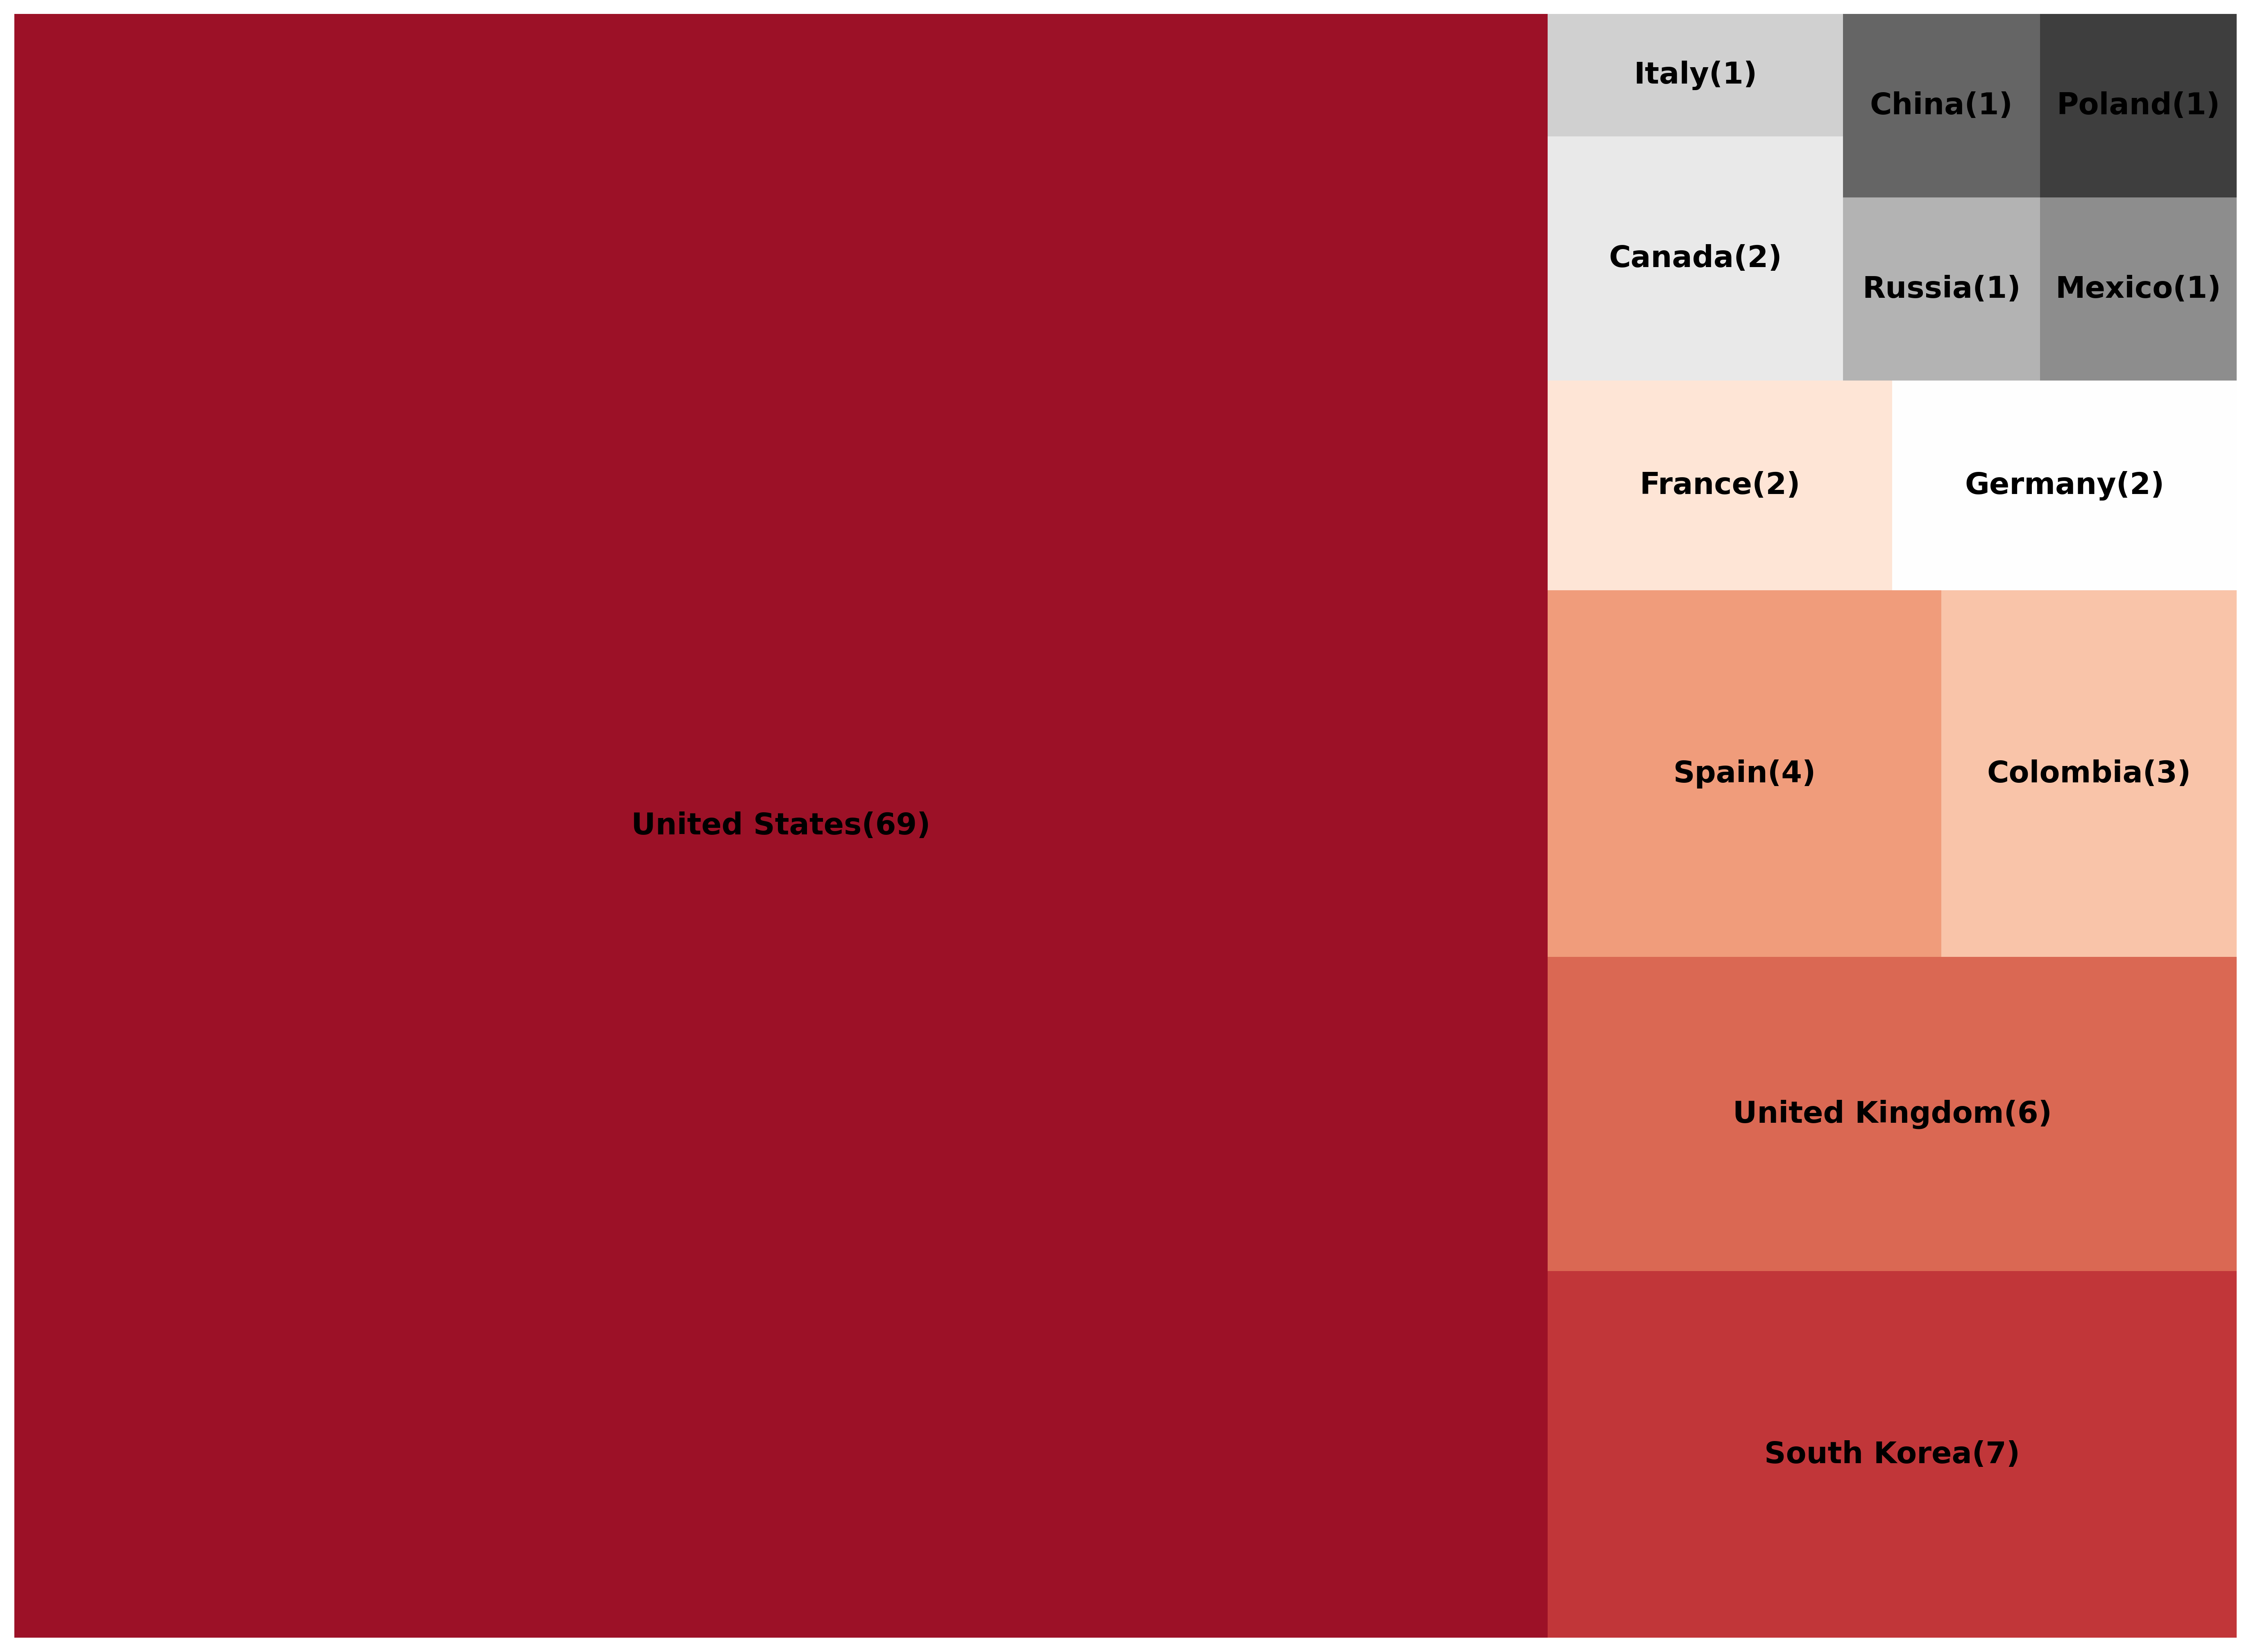

In [92]:
##### import squarify

fig = plt.figure(figsize=(20,15), dpi=350)
squarify.plot(counter_view100['counts'], 
              #label = counter_view100['originCountry'], 
              color=sns.color_palette("RdGy", n_colors=13),
              label=["{}({})".format(a, b) for a, b in zip(counter_view100['originCountry'], counter_view100['counts'])],
             linewidth=4, text_kwargs={'fontsize':15, 'fontweight' : 'bold'})
#plt.title('Country of origin of Netflix Top 100 (2020)', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold', pad=20)
plt.axis('off')
plt.show()

## 2020 넷플릭스 컨텐츠 인기순위 500위의 생산국가

### counter_view500 변수 생성

In [ ]:
view_top500 = df_country[:][:500]
view_top500.tail(5)

### 인기 순위 500위까지 생산국가 별 제작 영화 수

#### counter_view500 변수 생성

In [ ]:
# 생산국가의 빈도수 세기
counter_view500=view_top500.originCountry.value_counts()
counter_view500

#### Series를 dataFrame으로 변경

In [ ]:
counter_500=counter_view500.rename_axis('originCountry').reset_index(name='counts')
counter_view500=counter_500
counter_view500

### 인기순위 500위 분석 insight

In [ ]:
# 500개 콘텐츠 중 상위 5개국의 비율이 78.4%
tot500 = sum(counter_view500.counts)
top500_5 = sum(counter_view500.counts[:5]) 

print(f'total : {tot500}')
print(f'top 5 countries : {top500_5}')
print(f'percentage : {top500_5}/{tot500} = {100 * top500_5/tot500}')

In [ ]:
# 500개 콘텐츠 중 상위 15개국의 비율이 94.4
tot500 = sum(counter_view500.counts)
top15 = sum(counter_view500.counts[:15]) 

print(f'total : {tot500}')
print(f'top 15 countries : {top15}')
print(f'percentage : {top15}/{tot500} = {100 * top15/tot500}')

1. 미국은 거의 60-70% 를 차지하고 있다.
2. 한국은 생산량이 많지 않은데 탑순위에 계속 있다. 인기 있는 하나의 문화가 된 것 같다. 우리나라 출신의 드라마는 믿고 보는 유행이 생긴 것 같다.
3. 콘텐츠 500위로 잘랐을때, 1~3위 빼고,, 딱히 많이 생산한다고 인기순위에 오르는 것 같지 않다. 일본은 우리나라보다 두배정도 많이 생산했는데도 8위임
4. 스페인의 순위가 눈에 띈다. 총 43개밖에 생산안했는데 500위 안에 18개나 들어서 4위다.
5. 프랑스랑 약 2배정도 차이나는 생산량인데 오히려 프랑스보다 더 높은 순위에 들었다.
6. 넷플릭스가 한국에 투자를 하는 이유를 알 것 같다. us 제외하고, 구독자도 꽤 많고, 한국의 콘텐츠가 인기가 많은 것이 이유이지 않을까..? 예상한다. 시나리오에 대한 확신만 있으면 성공할 수 있는 조건이라고 생각한다.

In [ ]:
import squarify

fig = plt.figure(figsize=(30,20), dpi=350)
squarify.plot(counter_view500['counts'], 
              #label = counter_view500['originCountry'], 
              label=["{}({})".format(a, b) for a, b in zip(counter_view500['originCountry'], counter_view500['counts'])],
              color=sns.color_palette("RdGy", n_colors=34),
             linewidth=4, text_kwargs={'fontsize':15, 'fontweight' : 'bold'})
#plt.title('Country of origin of Netflix Top 500 (2020)', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold', pad=20)
plt.axis('off')
plt.show()

# 영화 top 20 시각화 (title, viewpoint, originCountry)

In [ ]:
df.head(2)

In [ ]:
df_netflix=df[['Title','Value','originCountry']]

In [ ]:
df_netflix.head(2)

In [ ]:
df_netflix_20=df_netflix[:][:20]
df_netflix_20

In [ ]:
#from matplotlib import gridspec
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(df_netflix_20['Value'], df_netflix_20['Title'], ax=ax, palette="RdGy")
# ax.set_xticklabels(df_netflix_20['Value'], rotation='90', fontsize = 13)
ax.set_title('Netflix Top 20 (2020)', fontsize=20, fontweight='bold', pad = 15)
plt.xlabel('Value', fontsize=12, labelpad=20, fontweight='bold')
plt.ylabel('Title (origin of Country)', fontsize=12, labelpad=10, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()